# Ch 5-2 Clustering (군집화)

### K-means

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [40]:
iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
print(irisDF.info())
irisDF.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

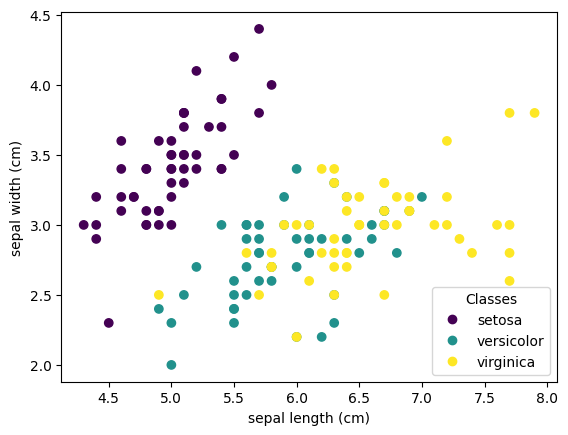

In [42]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [18]:
# 개정판 소스 코드 수정(2019.12.24)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
kmeans.fit(irisDF)

irisDF['target'] = iris.target
irisDF['km_cluster']=kmeans.labels_
iris_result = irisDF.groupby(['target','km_cluster'])['sepal_length'].count()
print(iris_result)

target  km_cluster
0       1             50
1       0             47
        2              3
2       0             14
        2             36
Name: sepal_length, dtype: int64


>[!WARNING]
> 군집화 할뿐 원래 정답을 가지고 있지 않기 때문에 라벨된 명은 주의해야 한다.

In [19]:
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,km_cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


[Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)')]

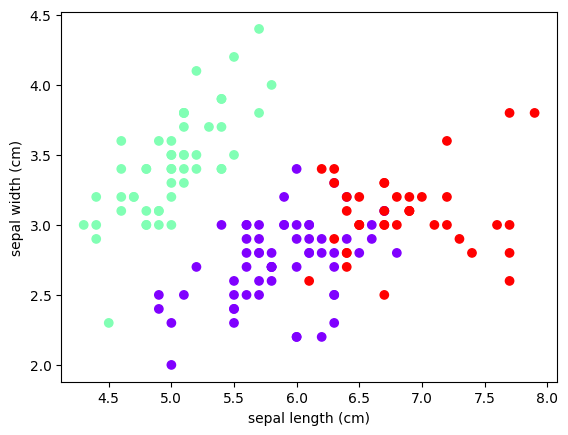

In [21]:
_, ax = plt.subplots()
scatter = ax.scatter(irisDF.iloc[:,0], irisDF.iloc[:,1], c=kmeans.labels_ , cmap='rainbow')
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
# _ = ax.legend(
#    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
#)

#### Hierarchical clustering

In [22]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram, linkage

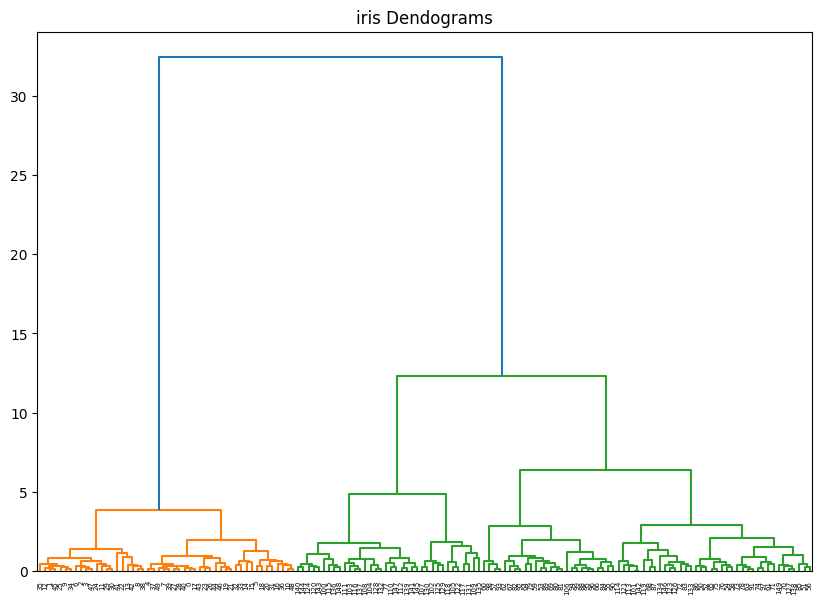

In [23]:
plt.figure(figsize=(10, 7))
plt.title("iris Dendograms")
dend = shc.dendrogram(shc.linkage(irisDF.iloc[:,0:4], method='ward'))

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
hc_cluster.fit_predict(irisDF.iloc[:,0:4])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

[Text(0.5, 0, 'sepal length (cm)'), Text(0, 0.5, 'sepal width (cm)')]

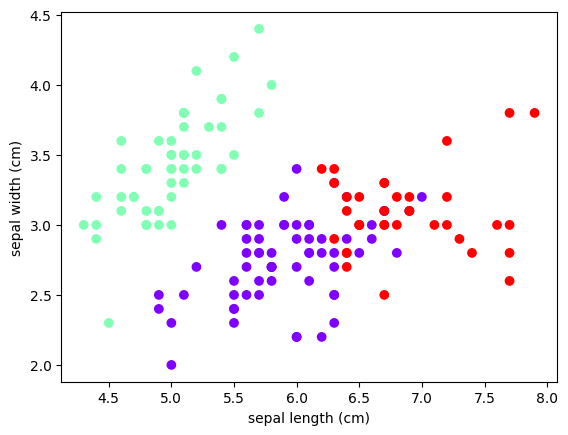

In [26]:
_, ax = plt.subplots()
scatter = ax.scatter(irisDF.iloc[:,0], irisDF.iloc[:,1], c=hc_cluster.labels_, cmap='rainbow')
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
# _ = ax.legend(
#    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
# )

### GMM

In [27]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 클러스터링 결과를 irisDF 의 'gmm_cluster' 컬럼명으로 저장
irisDF['gmm_cluster'] = gmm_cluster_labels
irisDF['target'] = iris.target

# target 값에 따라서 gmm_cluster 값이 어떻게 매핑되었는지 확인. 
iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       1              50
1       0              45
        2               5
2       2              50
Name: count, dtype: int64


### DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result = irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


[Text(0.5, 1.0, 'DBSCAN'),
 Text(0.5, 0, 'sepal length (cm)'),
 Text(0, 0.5, 'sepal width (cm)')]

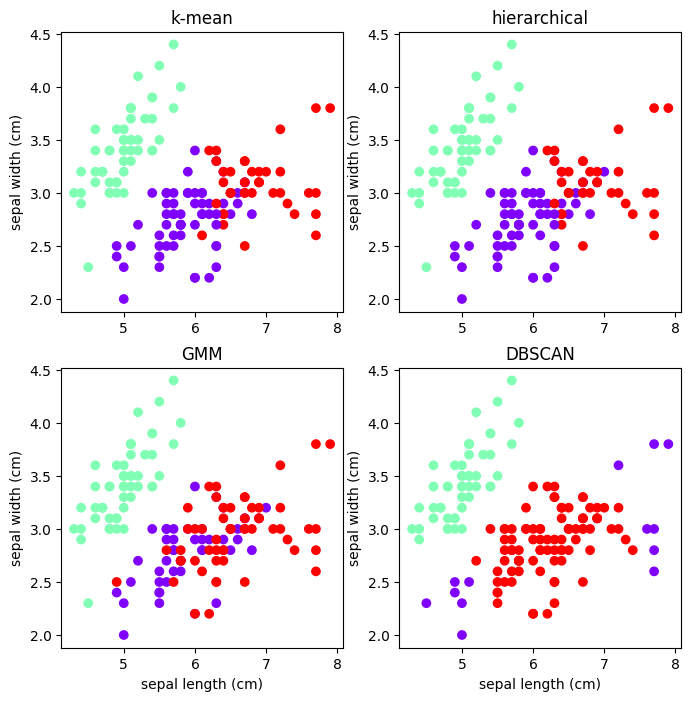

In [39]:
_, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].scatter(irisDF.iloc[:,0], irisDF.iloc[:,1], c=kmeans.labels_, cmap='rainbow')
ax[0,0].set(title="k-mean",ylabel=iris.feature_names[1])
ax[0,1].scatter(irisDF.iloc[:,0], irisDF.iloc[:,1], c=hc_cluster.labels_, cmap='rainbow')
ax[0,1].set(title="hierarchical",ylabel=iris.feature_names[1])
ax[1,0].scatter(irisDF.iloc[:,0], irisDF.iloc[:,1], c=gmm_cluster_labels, cmap='rainbow')
ax[1,0].set(title="GMM",xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
ax[1,1].scatter(irisDF.iloc[:,0], irisDF.iloc[:,1], c=dbscan_labels, cmap='rainbow')
ax[1,1].set(title="DBSCAN",xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])

## 차원축소 (dimensionality reduction)

### PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 3)

In [44]:
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF['pca_z'] = pca_transformed[:,2]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,pca_x,pca_y,pca_z
0,5.1,3.5,1.4,0.2,-2.684126,0.319397,-0.027915
1,4.9,3.0,1.4,0.2,-2.714142,-0.177001,-0.210464
2,4.7,3.2,1.3,0.2,-2.888991,-0.144949,0.017900
3,4.6,3.1,1.5,0.2,-2.745343,-0.318299,0.031559
4,5.0,3.6,1.4,0.2,-2.728717,0.326755,0.090079


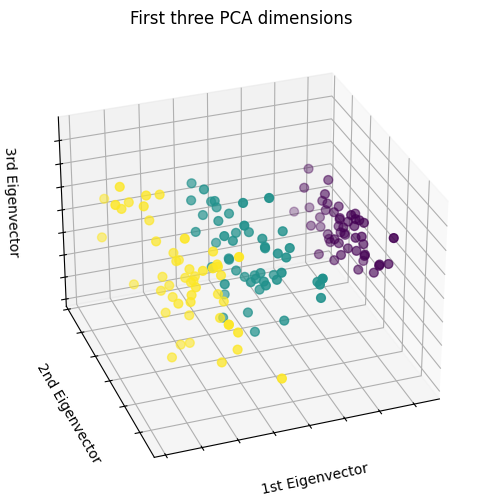

In [45]:
import mpl_toolkits.mplot3d  # noqa: F401

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)
ax.set_title("First three PCA dimensions")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()